# 1. Import LIbraries

In [2]:
import fastf1 as ff1
import matplotlib.pyplot as plt
from fastf1 import plotting
from fastf1 import utils
from matplotlib import animation
import numpy as np
import pandas as pd
import collections

## Notebook settings

In [3]:
# for interactive graph
%matplotlib notebook
%matplotlib notebook

In [4]:
# DataFrame settings
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
# fastf1 plotting settings
plotting.setup_mpl()
# enable the cache
ff1.Cache.enable_cache('cache')

# 2. Import Data

In [6]:
# Qualifying data
quali = ff1.get_session(2022,'Bahrain','Q')

In [7]:
# Lap data
laps = quali.load_laps(with_telemetry = True)

core           INFO 	Loading laps for Bahrain Grand Prix - Qualifying [v2.1.11]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
utils          INFO 	NumExpr defaulting to 8 threads.
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['47', '31', '6', '18', '14', '55', '1', '10', '23', '22', '4', '27', '24', '16', '77', '63', '11', '3', '44', '20']


## Team ferrari - Leclarc

In [8]:
# Leclarc fastest lap
lec_q          = laps.pick_driver('LEC').pick_fastest()

# # Add telemetry data
lec_fastlap_q  = lec_q.get_telemetry().add_distance().reset_index(drop=True)
lec_fastlap_q

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance
0,2022-03-19 15:58:18.339,0 days 01:13:17.410000,,591.047778,0 days 00:00:00,10514,292,7,100,0,12,interpolation,0.000006,OnTrack,-380,1280,-159,0.000000
1,2022-03-19 15:58:18.423,0 days 01:13:17.494000,,591.047778,0 days 00:00:00.084000,10502,293,7,100,0,12,pos,0.001283,OnTrack,-377,1350,-159,6.836667
2,2022-03-19 15:58:18.491,0 days 01:13:17.562000,,591.047778,0 days 00:00:00.152000,10478,294,8,100,0,12,car,0.002319,OnTrack,-373,1413,-158,12.390000
3,2022-03-19 15:58:18.723,0 days 01:13:17.794000,,591.047778,0 days 00:00:00.384000,10519,295,8,100,0,12,pos,0.005868,OnTrack,-362,1661,-158,31.401111
4,2022-03-19 15:58:18.731,0 days 01:13:17.802000,77,591.047778,0 days 00:00:00.392000,10560,296,8,100,0,12,car,0.005991,OnTrack,-361,1669,-157,32.058889
5,2022-03-19 15:58:19.123,0 days 01:13:18.194000,77,585.270000,0 days 00:00:00.784000,10628,297,8,100,0,12,pos,0.012048,OnTrack,-346,2026,-159,64.398889
6,2022-03-19 15:58:19.131,0 days 01:13:18.202000,77,579.492222,0 days 00:00:00.792000,10696,299,8,100,0,12,car,0.012172,OnTrack,-345,2030,-159,65.063333
7,2022-03-19 15:58:19.291,0 days 01:13:18.362000,77,574.292222,0 days 00:00:00.952000,10696,300,8,100,0,12,car,0.014653,OnTrack,-343,2092,-159,78.396667
8,2022-03-19 15:58:19.363,0 days 01:13:18.434000,77,567.203333,0 days 00:00:01.024000,10734,301,8,100,0,12,pos,0.015775,OnTrack,-342,2126,-159,84.416667
9,2022-03-19 15:58:19.663,0 days 01:13:18.734000,77,560.114444,0 days 00:00:01.324000,10773,302,8,100,0,12,pos,0.020476,OnTrack,-332,2377,-159,109.583333


In [9]:
lec_fastlap_q.info()

<class 'fastf1.core.Telemetry'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Date                   697 non-null    datetime64[ns] 
 1   SessionTime            697 non-null    timedelta64[ns]
 2   DriverAhead            697 non-null    object         
 3   DistanceToDriverAhead  697 non-null    float64        
 4   Time                   697 non-null    timedelta64[ns]
 5   RPM                    697 non-null    int64          
 6   Speed                  697 non-null    int64          
 7   nGear                  697 non-null    int64          
 8   Throttle               697 non-null    int64          
 9   Brake                  697 non-null    int64          
 10  DRS                    697 non-null    int64          
 11  Source                 697 non-null    object         
 12  RelativeDistance       697 non-null    float64        
 

## Team redbull - Perez

In [10]:
# Leclarc fastest lap
ver_q          = laps.pick_driver('VER').pick_fastest()

# # Add telemetry data
ver_fastlap_q  = ver_q.get_telemetry().add_distance().reset_index(drop=True)
ver_fastlap_q

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance
0,2022-03-19 15:58:45.862,0 days 01:13:44.933000,,1240.833333,0 days 00:00:00,10911,293,7,100,0,12,interpolation,0.000058,OnTrack,-380,1266,-159,0.000000
1,2022-03-19 15:58:45.931,0 days 01:13:45.002000,,1240.833333,0 days 00:00:00.069000,10693,294,7,100,0,12,car,0.001110,OnTrack,-378,1325,-159,5.635000
2,2022-03-19 15:58:45.963,0 days 01:13:45.034000,,1240.833333,0 days 00:00:00.101000,10583,294,7,100,0,12,pos,0.001599,OnTrack,-377,1358,-159,8.248333
3,2022-03-19 15:58:46.131,0 days 01:13:45.202000,55,1240.833333,0 days 00:00:00.269000,10474,295,8,100,0,12,car,0.004165,OnTrack,-365,1580,-158,22.015000
4,2022-03-19 15:58:46.243,0 days 01:13:45.314000,55,1240.811111,0 days 00:00:00.381000,10552,295,8,100,0,12,pos,0.005880,OnTrack,-360,1702,-159,31.192778
5,2022-03-19 15:58:46.291,0 days 01:13:45.362000,55,1240.788889,0 days 00:00:00.429000,10630,296,8,100,0,12,car,0.006617,OnTrack,-358,1733,-159,35.139444
6,2022-03-19 15:58:46.491,0 days 01:13:45.562000,55,1240.733333,0 days 00:00:00.629000,10727,298,8,100,0,12,car,0.009702,OnTrack,-356,1795,-159,51.695000
7,2022-03-19 15:58:46.503,0 days 01:13:45.574000,55,1240.666667,0 days 00:00:00.641000,10744,299,8,100,0,12,pos,0.009888,OnTrack,-356,1801,-159,52.691667
8,2022-03-19 15:58:46.731,0 days 01:13:45.802000,55,1240.600000,0 days 00:00:00.869000,10761,301,8,100,0,12,car,0.013442,OnTrack,-347,1991,-158,71.755000
9,2022-03-19 15:58:46.824,0 days 01:13:45.895000,55,1240.570370,0 days 00:00:00.962000,10771,301,8,100,0,12,pos,0.014894,OnTrack,-344,2076,-159,79.530833


## combining both df into one along axis 1

In [11]:
# column names of ver_fastest_q
ver_col = ['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'RelativeDistance', 'Status', 'X', 'Y', 'Z', 'Distance']

In [12]:
# adding suffix "_v" to columns of ver_fastest_q
new_col = []
for i in ver_col:
    i = i+'_v'
    new_col.append(i)
new_col

['Date_v',
 'SessionTime_v',
 'DriverAhead_v',
 'DistanceToDriverAhead_v',
 'Time_v',
 'RPM_v',
 'Speed_v',
 'nGear_v',
 'Throttle_v',
 'Brake_v',
 'DRS_v',
 'Source_v',
 'RelativeDistance_v',
 'Status_v',
 'X_v',
 'Y_v',
 'Z_v',
 'Distance_v']

In [13]:
ver_fastlap_q.columns = new_col

In [14]:
df1= pd.concat([ver_fastlap_q,lec_fastlap_q],axis = 1)
df1.tail(20)

,Date_v,SessionTime_v,DriverAhead_v,DistanceToDriverAhead_v,Time_v,RPM_v,Speed_v,nGear_v,Throttle_v,Brake_v,DRS_v,Source_v,RelativeDistance_v,Status_v,X_v,Y_v,Z_v,Distance_v,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance
685,2022-03-19 16:00:13.983,0 days 01:15:13.054000,55,1039.046111,0 days 00:01:28.121000,11590,258,6,100,0,14,pos,0.959633,OnTrack,-485,-706,-158,5148.287222,2022-03-19 15:59:47.571,0 days 01:14:46.642000,77,477.818333,0 days 00:01:29.232000,11167.0,277.0,7.0,100.0,0.0,12.0,car,0.978079,OnTrack,-433.0,227.0,-158.0,5256.146111
686,2022-03-19 16:00:14.131,0 days 01:15:13.202000,55,1035.690556,0 days 00:01:28.269000,11650,260,6,100,0,14,car,0.961626,OnTrack,-479,-606,-158,5158.976111,2022-03-19 15:59:47.843,0 days 01:14:46.914000,77,476.496111,0 days 00:01:29.504000,11252.0,279.0,7.0,100.0,0.0,12.0,pos,0.982043,OnTrack,-423.0,439.0,-159.0,5277.226111
687,2022-03-19 16:00:14.243,0 days 01:15:13.314000,55,1031.143056,0 days 00:01:28.381000,11293,261,6,100,0,14,pos,0.963151,OnTrack,-474,-519,-159,5167.096111,2022-03-19 15:59:47.851,0 days 01:14:46.922000,77,475.173889,0 days 00:01:29.512000,11338.0,282.0,7.0,100.0,0.0,12.0,car,0.982160,OnTrack,-422.0,448.0,-159.0,5277.852778
688,2022-03-19 16:00:14.423,0 days 01:15:13.494000,55,1026.595556,0 days 00:01:28.561000,10936,263,6,100,0,14,pos,0.965628,OnTrack,-467,-387,-159,5180.246111,2022-03-19 15:59:48.043,0 days 01:14:47.114000,77,474.035000,0 days 00:01:29.704000,11403.0,282.0,7.0,100.0,0.0,12.0,pos,0.984968,OnTrack,-409.0,706.0,-159.0,5292.892778
689,2022-03-19 16:00:14.452,0 days 01:15:13.523000,55,1022.048056,0 days 00:01:28.590000,10580,265,7,100,0,12,car,0.966030,OnTrack,-465,-366,-158,5182.380833,2022-03-19 15:59:48.051,0 days 01:14:47.122000,77,472.896111,0 days 00:01:29.712000,11468.0,283.0,7.0,100.0,0.0,12.0,car,0.985085,OnTrack,-408.0,714.0,-158.0,5293.521667
690,2022-03-19 16:00:14.623,0 days 01:15:13.694000,55,1015.070278,0 days 00:01:28.761000,10691,267,7,100,0,12,pos,0.968409,OnTrack,-459,-240,-159,5195.063333,2022-03-19 15:59:48.291,0 days 01:14:47.362000,77,469.696111,0 days 00:01:29.952000,11547.0,286.0,7.0,100.0,0.0,12.0,car,0.988633,OnTrack,-400.0,863.0,-158.0,5312.588333
691,2022-03-19 16:00:14.772,0 days 01:15:13.843000,55,1008.092500,0 days 00:01:28.910000,10803,270,7,100,0,12,car,0.970503,OnTrack,-450,-83,-159,5206.238333,2022-03-19 15:59:48.451,0 days 01:14:47.522000,77,467.251667,0 days 00:01:30.112000,11778.0,288.0,7.0,100.0,0.0,12.0,car,0.991015,OnTrack,-397.0,928.0,-158.0,5325.388333
692,2022-03-19 16:00:15.023,0 days 01:15:14.094000,55,999.281250,0 days 00:01:29.161000,10874,273,7,100,0,12,pos,0.974081,OnTrack,-436,189,-159,5225.272500,2022-03-19 15:59:48.503,0 days 01:14:47.574000,77,465.962778,0 days 00:01:30.164000,11636.0,288.0,7.0,100.0,0.0,12.0,pos,0.991791,OnTrack,-396.0,961.0,-159.0,5329.548333
693,2022-03-19 16:00:15.171,0 days 01:15:14.242000,55,990.470000,0 days 00:01:29.309000,10946,276,7,100,0,12,car,0.976204,OnTrack,-431,270,-158,5236.619167,2022-03-19 15:59:48.611,0 days 01:14:47.682000,77,464.673889,0 days 00:01:30.272000,11495.0,289.0,7.0,100.0,0.0,12.0,car,0.993405,OnTrack,-391.0,1045.0,-159.0,5338.218333
694,2022-03-19 16:00:15.383,0 days 01:15:14.454000,55,985.270000,0 days 00:01:29.521000,11066,277,7,100,0,12,pos,0.979252,OnTrack,-427,358,-159,5252.931389,2022-03-19 15:59:48.683,0 days 01:14:47.754000,77,462.607222,0 days 00:01:30.344000,11064.0,289.0,7.0,100.0,0.0,12.0,pos,0.994483,OnTrack,-389.0,1106.0,-159.0,5343.998333


In [15]:
# delta_time, lec_ref_tel, ver_compare_tel = utils.delta_time(lec_q, ver_q)
# #ham is reference, lec is compared
# ver_compare_tel.columns

# ver_col = ['Date', 'SessionTime', 'RPM', 'Speed', 'nGear', 'Throttle', 'Brake',
#        'DRS', 'Source', 'Time', 'Distance']

# new_ver_col = []

# for i in ver_col:
#     i = i+'_v'
#     new_ver_col.append(i)

# ver_compare_tel.columns = new_ver_col

# df_combine = pd.concat([lec_ref_tel,ver_compare_tel],axis=1)

In [16]:
# adding delta time i.e. lap time diff of both drivers
df1['Time_diff'] =  df1['Time']-df1['Time_v']

In [17]:
# filling Nat values with None (easy to work with)
df1 = df1.replace({pd.NaT: None})

In [18]:
# dealing with Nan values in the data set 
df1['X']          = df1['X'].fillna(lec_fastlap_q['X'].iloc[-1])
df1['Y']          = df1['Y'].fillna(lec_fastlap_q['Y'].iloc[-1])
df1['Speed']      = df1['Speed'].fillna(lec_fastlap_q['Speed'].iloc[-1])
df1['Throttle']   = df1['Throttle'].fillna(0)
df1['Brake']      = df1['Brake'].fillna(0)
df1['Time']       = df1['Time'].fillna(lec_fastlap_q['Time'].iloc[-1])
df1['Time_diff']  = df1['Time_diff'].fillna(df1['Time_diff'].iloc[696])

In [19]:
df1.info()

<class 'fastf1.core.Telemetry'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Date_v                   705 non-null    object         
 1   SessionTime_v            705 non-null    object         
 2   DriverAhead_v            705 non-null    object         
 3   DistanceToDriverAhead_v  705 non-null    object         
 4   Time_v                   705 non-null    object         
 5   RPM_v                    705 non-null    int64          
 6   Speed_v                  705 non-null    int64          
 7   nGear_v                  705 non-null    int64          
 8   Throttle_v               705 non-null    int64          
 9   Brake_v                  705 non-null    int64          
 10  DRS_v                    705 non-null    int64          
 11  Source_v                 705 non-null    object         
 12  RelativeDistance_v       705

In [20]:
df1

,Date_v,SessionTime_v,DriverAhead_v,DistanceToDriverAhead_v,Time_v,RPM_v,Speed_v,nGear_v,Throttle_v,Brake_v,DRS_v,Source_v,RelativeDistance_v,Status_v,X_v,Y_v,Z_v,Distance_v,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Time_diff
0,2022-03-19 15:58:45.862000,0 days 01:13:44.933000,,1240.83,0 days 00:00:00,10911,293,7,100,0,12,interpolation,5.8487e-05,OnTrack,-380,1266,-159,0,2022-03-19 15:58:18.339000,0 days 01:13:17.410000,,591.048,0 days 00:00:00,10514,292.0,7,100.0,0.0,12,interpolation,6.36439e-06,OnTrack,-380.0,1280.0,-159,0,0 days 00:00:00
1,2022-03-19 15:58:45.931000,0 days 01:13:45.002000,,1240.83,0 days 00:00:00.069000,10693,294,7,100,0,12,car,0.00111048,OnTrack,-378,1325,-159,5.635,2022-03-19 15:58:18.423000,0 days 01:13:17.494000,,591.048,0 days 00:00:00.084000,10502,293.0,7,100.0,0.0,12,pos,0.00128316,OnTrack,-377.0,1350.0,-159,6.83667,0 days 00:00:00.015000
2,2022-03-19 15:58:45.963000,0 days 01:13:45.034000,,1240.83,0 days 00:00:00.101000,10583,294,7,100,0,12,pos,0.00159865,OnTrack,-377,1358,-159,8.24833,2022-03-19 15:58:18.491000,0 days 01:13:17.562000,,591.048,0 days 00:00:00.152000,10478,294.0,8,100.0,0.0,12,car,0.00231887,OnTrack,-373.0,1413.0,-158,12.39,0 days 00:00:00.051000
3,2022-03-19 15:58:46.131000,0 days 01:13:45.202000,55,1240.83,0 days 00:00:00.269000,10474,295,8,100,0,12,car,0.00416495,OnTrack,-365,1580,-158,22.015,2022-03-19 15:58:18.723000,0 days 01:13:17.794000,,591.048,0 days 00:00:00.384000,10519,295.0,8,100.0,0.0,12,pos,0.00586779,OnTrack,-362.0,1661.0,-158,31.4011,0 days 00:00:00.115000
4,2022-03-19 15:58:46.243000,0 days 01:13:45.314000,55,1240.81,0 days 00:00:00.381000,10552,295,8,100,0,12,pos,0.00588002,OnTrack,-360,1702,-159,31.1928,2022-03-19 15:58:18.731000,0 days 01:13:17.802000,77,591.048,0 days 00:00:00.392000,10560,296.0,8,100.0,0.0,12,car,0.00599068,OnTrack,-361.0,1669.0,-157,32.0589,0 days 00:00:00.011000
5,2022-03-19 15:58:46.291000,0 days 01:13:45.362000,55,1240.79,0 days 00:00:00.429000,10630,296,8,100,0,12,car,0.00661682,OnTrack,-358,1733,-159,35.1394,2022-03-19 15:58:19.123000,0 days 01:13:18.194000,77,585.27,0 days 00:00:00.784000,10628,297.0,8,100.0,0.0,12,pos,0.0120485,OnTrack,-346.0,2026.0,-159,64.3989,0 days 00:00:00.355000
6,2022-03-19 15:58:46.491000,0 days 01:13:45.562000,55,1240.73,0 days 00:00:00.629000,10727,298,8,100,0,12,car,0.00970235,OnTrack,-356,1795,-159,51.695,2022-03-19 15:58:19.131000,0 days 01:13:18.202000,77,579.492,0 days 00:00:00.792000,10696,299.0,8,100.0,0.0,12,car,0.0121724,OnTrack,-345.0,2030.0,-159,65.0633,0 days 00:00:00.163000
7,2022-03-19 15:58:46.503000,0 days 01:13:45.574000,55,1240.67,0 days 00:00:00.641000,10744,299,8,100,0,12,pos,0.00988849,OnTrack,-356,1801,-159,52.6917,2022-03-19 15:58:19.291000,0 days 01:13:18.362000,77,574.292,0 days 00:00:00.952000,10696,300.0,8,100.0,0.0,12,car,0.0146534,OnTrack,-343.0,2092.0,-159,78.3967,0 days 00:00:00.311000
8,2022-03-19 15:58:46.731000,0 days 01:13:45.802000,55,1240.6,0 days 00:00:00.869000,10761,301,8,100,0,12,car,0.0134423,OnTrack,-347,1991,-158,71.755,2022-03-19 15:58:19.363000,0 days 01:13:18.434000,77,567.203,0 days 00:00:01.024000,10734,301.0,8,100.0,0.0,12,pos,0.0157745,OnTrack,-342.0,2126.0,-159,84.4167,0 days 00:00:00.155000
9,2022-03-19 15:58:46.824000,0 days 01:13:45.895000,55,1240.57,0 days 00:00:00.962000,10771,301,8,100,0,12,pos,0.0148936,OnTrack,-344,2076,-159,79.5308,2022-03-19 15:58:19.663000,0 days 01:13:18.734000,77,560.114,0 days 00:00:01.324000,10773,302.0,8,100.0,0.0,12,pos,0.0204764,OnTrack,-332.0,2377.0,-159,109.583,0 days 00:00:00.362000


# Color correction Function for bar plots

In [21]:
# plot gradient color for bar plots 
def gradientbars_sliced(bars,bar_color='Reds'):
    ax = bars[0].axes
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor("none")
        x, y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        grad = np.linspace(y, y + h, 256).reshape(256, 1)
        ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
                  vmin=ymin, vmax=ymax, cmap=bar_color)
    ax.axis([xmin, xmax, ymin, ymax])

# 3. Plottting

<IPython.core.display.Javascript object>


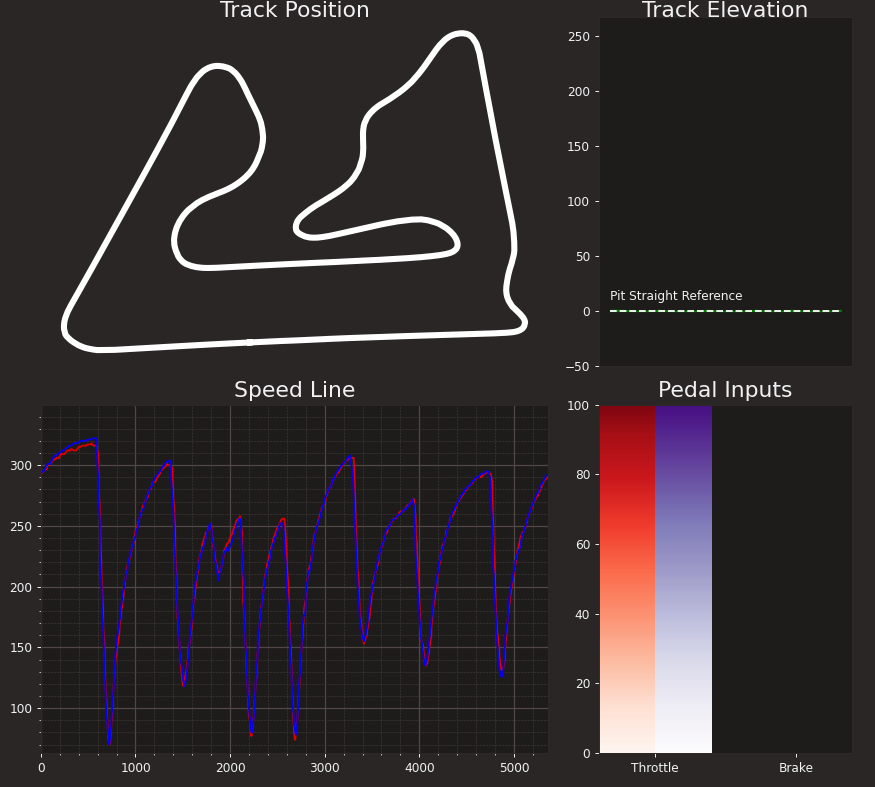

animation       INFO 	Animation.save using <class 'matplotlib.animation.PillowWriter'>
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
C:\Users\GL552VW\AppData\Local\Temp\ipykernel_144\1869253809.py:12: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; a

TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

In [41]:
df = df1


# x and y coordinates
x1 = df['Y']
y1 = df['X']

x2 = df['Y_v']
y2 = df['X_v']

# Distance and speed
d  = df['Distance']
s  = df['Speed']

d2 = df['Distance_v']
s2 = df['Speed_v']

# Pedal inputs
gas_pedal_l   = df['Throttle']
brake_pedal_l = df['Brake']

gas_pedal_v   = df['Throttle_v']
brake_pedal_v = df['Brake_v']

# Current gear engaged
g_l = df['nGear']
g_v = df['nGear_v']

driver_col1 = plotting.team_color(lec_q['Team'])
driver_col2 = plotting.team_color(ver_q['Team'])


dist_cov  = df['RelativeDistance_v'].apply(lambda x: round(x*100,2))

# Initiating plotting
fig1, ax1 = plt.subplots(2,2,figsize=(10,9),gridspec_kw={'width_ratios': [4, 2]}) #

# text data for first plot ax1[0,0] 
# driver1 i.e lec
time_lap  = df['Time'].astype('string')
time_lap  = time_lap.str.lstrip('0 days 00:')
time_lap  = time_lap.str.rstrip('00')
# driver2 i.e. ver
time_lap2  = df['Time_v'].astype('string')
time_lap2  = time_lap2.str.lstrip('0 days 00:')
time_lap2  = time_lap2.str.rstrip('00')

# text data for third plot ax1[0,1]
# diff of laptime data
delta_time  = df['Time_diff'].astype('string')
delta_time  = delta_time.str.lstrip('0 days 00:')
delta_time  = delta_time.str.rstrip('00')

# elevation initiating ax1[0,1] 
elev_len  = 20            # no of points for plot
z_values  = df['Z_v']       # elevation data
z_values  = z_values.apply(lambda i: i-z_values[0]) # reducing the z values  
elevation = collections.deque(np.zeros(elev_len))   # deque from collection(kind of list element)



# # text data gear shift 
# shift = ''
# gear_up_down = []
# for i,j in zip(g_l,g_l[1:]):
#     if   i < j:
#         shift = f'Upshift   \u2b9d'
#         gear_up_down.append(shift)
#     elif i > j:
#         shift = f'Downshift \u2b9f'
#         gear_up_down.append(shift)
#     elif i == j:
#         gear_up_down.append(shift)
# gear_up_down.append(shift)


# animation
def frame(i):
    
    # for first plot ax1[0,0]
    ax1[0,0].cla()
    ax1[0,0].set_title('Track Position', fontsize = 18, y=0.96)
    ax1[0,0].axis('off')
    ax1[0,0].plot(lec_fastlap_q['Y'], lec_fastlap_q['X'], linewidth = 5.0, color = 'white')
    ax1[0,0].scatter(x1[i], y1[i], color=driver_col1, linewidth = 2.0, zorder = 3, label = 'Leclerc')
    ax1[0,0].scatter(x2[i], y2[i], color=driver_col2, linewidth = 2.0, zorder = 3, label = 'Verstappen')
#     dist_cov = round(df['Distance'][i]/np.max(df['Distance'])*100,1)
#     ax1[0,0].text(-4000, 7500, f'LAP COMPLETION :{dist_cov[i]}%')
    
    ax1[0,0].text(1000, 800, f'LAP TIME: {time_lap[i]}', color = driver_col1)
    ax1[0,0].text(1000, 300, f'LAP TIME: {time_lap2[i]}', color = driver_col2)
    ax1[0,0].legend()

#     
#     ax1[0,0].set_xlim( np.min(a), np.max(a) ) # fix the x axis
#     ax1[0,0].set_ylim( np.min(b), np.max(b) ) # fix the y axis
    
    # for second plot ax1[0,1]
    # get data
    elevation.popleft()
    elevation.append(z_values[i])
    
    # clear axis
    ax1[0,1].cla()
    
    # plot elevation
    # reference line
    ax1[0,1].hlines( y = z_values[0], xmin = 0, xmax = elev_len-1, linewidth = 1.5, linestyle = '--', colors = 'white')
    ax1[0,1].text(0, 10, f'Pit Straight Reference') # add text for the reference line
    
    # area plot 
    ax1[0,1].fill_between(range(0, elev_len), elevation, color = 'green')
    ax1[0,1].set_title('Track Elevation', fontsize = 18, y = 0.96)
    ax1[0,1].set_ylim(np.min(z_values)-50, np.max(z_values)+100) # broadening the y-axis
    ax1[0,1].get_xaxis().set_visible(False)                     # removing x-axis
    
    # bottom second
#     ax1[1,1].cla() # clear the previous image
#     bar1 = ax1[1,1].bar([1,2], [gas_pedal[i], brake_pedal[i]], width=0.4)
#     ax1[1,1].set_ylim(np.min(gas_pedal_l), np.max(gas_pedal_l))
#     ax1[1,1].set_xlim(0.5,2.5)
#     ax1[1,1].set_xticks([1,2])
#     ax1[1,1].set_xticklabels(['Throttle', 'Brake'])
#     ax1[1,1].set_title('Pedal Inputs', fontsize=18, y =0.98)
#     gradientbars_sliced(bar1)
    

    # bottom first
    ax1[1,0].cla()
    ax1[1,0].set_title('Speed Line', fontsize = 18, y =0.98) #
    ax1[1,0].minorticks_on()
#     ax[1].grid()
    grid = getattr(ax1[1,0], 'grid')
    grid(b=True, which='major', color='#4f4845', linestyle='-', linewidth=1)
    grid(b=True, which='minor', color='#3f3a38', linestyle='--', linewidth=0.5)
    
    ax1[1,0].plot(d[:i],   s[:i], color = driver_col1)   #
    ax1[1,0].plot(d2[:i], s2[:i], color = driver_col2)   #
    
    ax1[1,0].set_xlim(np.min(d), np.max(d)) # fix the x axis
    ax1[1,0].set_ylim(np.min(s)*0.9, np.max(s)*1.1) # fix the y axis
#     ax1[1,0].text(d[i], s[i], s=f"{s[i]-s2[i]}")
    ax1[1,0].text(d[i]-500, s[i], s=f"delta - {delta_time[i]}")
#     ax1[1,0].text(4000, 340, s=f"Current gear - {g_l[i]}")
#     ax1[1,0].text(4000, 330, s=f"{gear_up_down[i]}")

    ax1[1,1].cla()
    bar_t1 = ax1[1,1].bar([.2,1.2],[gas_pedal_l[i],brake_pedal_l[i]],width=.4)
    gradientbars_sliced(bar_t1)
    
    bar_t2 = ax1[1,1].bar([.6,1.6],[gas_pedal_v[i],brake_pedal_v[i]],width=.4)
    gradientbars_sliced(bar_t2,'Purples')
    ax1[1,1].set_ylim(np.min(gas_pedal_l), np.max(gas_pedal_l))
    ax1[1,1].set_xlim(0, 1.8)
    ax1[1,1].set_xticks([.4,1.4])
    ax1[1,1].set_xticklabels(['Throttle', 'Brake'])
    ax1[1,1].set_title('Pedal Inputs', fontsize=18, y =0.98)
    
    

    
    
anim1 = animation.FuncAnimation(fig1, frame, frames = len(x1)+1, interval = 1 ,repeat=False)

plt.tight_layout()
plt.show()

# writergif = animation.PillowWriter(fps=30)
# writergif.setup(fig1,'lec_ver_qlap.gif',dpi =50)
# anim1.save('test.gif', writer=writergif)
# https://towardsdatascience.com/the-simplest-way-of-making-gifs-and-math-videos-with-python-aec41da74c6e